# Homework 3 - Default Prediction
## Demetrios Lambropoulos
## Machine Learning

## Initialization

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
# URL Path containing data source
url = "https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Data/Default.xlsx?raw=true"

# Read Excel file at URL Path and store in data frame
df = pd.read_excel(url, index_col=0)

# Display the first 5 lines of data fram
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


## Split the dataset

### Split into df_train, df_test, df_validation

In [0]:
# Stratified sampling of the data into a 60% train and 40% test set
df_train, df_test = train_test_split(df, test_size=0.4)

# Stratified sampling of the test dataset into 20% test and 20% validation sets
df_test, df_validation = train_test_split(df_test, test_size=0.5)

# Display the percentage split of the data in the original dataset
x = df['default'].describe()['freq']
print ("Percentage in original dataframe: Yes", 
       (len(df)-x)/len(df), "No", x/len(df))

# Display the percentage split of the data in the training dataset
x = df_train['default'].describe()['freq']
print ("Percentage split in the train set: Yes", 
       (len(df_train)-x)/len(df_train), "No", x/len(df_train))

# Display the percentage split of the data in the test dataset
x = df_test['default'].describe()['freq']
print ("Percentage split in test set: Yes", 
       (len(df_test)-x)/len(df_test), "No", x/len(df_test))

# Display the percentage split of the data in the validation dataset
x = df_validation['default'].describe()['freq']
print ("Percentage split in validation set: Yes", 
       (len(df_validation)-x)/len(df_validation), "No", x/len(df_validation))

Percentage in original dataframe: Yes 0.0333 No 0.9667
Percentage split in the train set: Yes 0.03166666666666667 No 0.9683333333333334
Percentage split in test set: Yes 0.0325 No 0.9675
Percentage split in validation set: Yes 0.039 No 0.961


In [0]:
# Function to convert to numerical values
def convert_yes_no(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
    else:
        return x

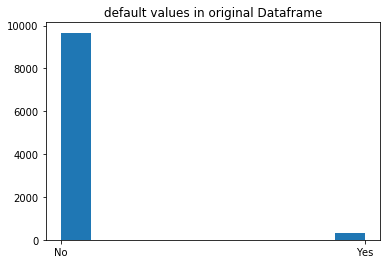

In [0]:
# Create histogram of 'default' values in the dataframe
plt.hist(df.default)

# Set title of histogram 
plt.title('default values in original Dataframe')

# Display the histogram
plt.show()

# Convert String values to numeric for 'default'
df['default'] = df['default'].apply(convert_yes_no)

# Convert String values to numeric for 'student'
df['student'] = df['student'].apply(convert_yes_no)

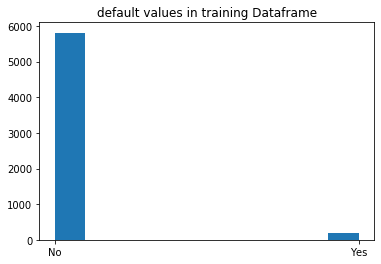

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [0]:
# Create histogram of 'default' values in the dataframe
plt.hist(df_train.default)

# Set title of histogram 
plt.title('default values in training Dataframe')

# Display the histogram
plt.show()

# Convert String values to numeric for 'default'
df_train['default'] = df_train['default'].apply(convert_yes_no)

# Convert String values to numeric for 'student'
df_train['student'] = df_train['student'].apply(convert_yes_no)

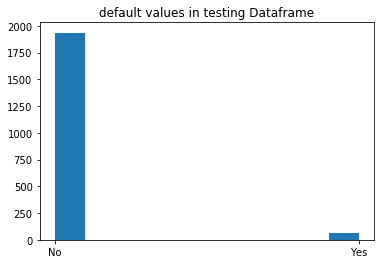

In [0]:
# Create histogram of 'default' values in the dataframe
plt.hist(df_test.default)

# Set title of histogram 
plt.title('default values in testing Dataframe')

# Display the histogram
plt.show()

# Convert String values to numeric for 'default'
df_test['default'] = df_test['default'].apply(convert_yes_no)

# Convert String values to numeric for 'student'
df_test['student'] = df_test['student'].apply(convert_yes_no)

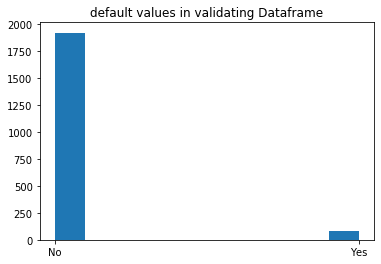

In [0]:
# Create histogram of 'default' values in the dataframe
plt.hist(df_validation.default)

# Set title of histogram 
plt.title('default values in validating Dataframe')

# Display the histogram
plt.show()

# Convert String values to numeric for 'default'
df_validation['default'] = df_validation['default'].apply(convert_yes_no)

# Convert String values to numeric for 'student'
df_validation['student'] = df_validation['student'].apply(convert_yes_no)

## Augment the Data

#### Augment data with oversampling

Text(0.5, 1.0, 'default values in oversampling Dataframe')

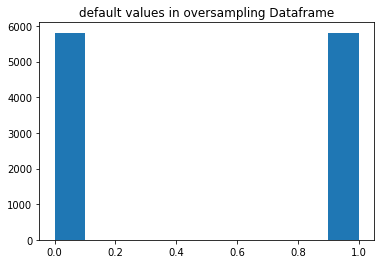

In [0]:
# Import the resample library from sklearn.utils for oversampling
from sklearn.utils import resample

# Split the training datasets to yes and no blocks
no = df_train[df_train.default==0]
yes = df_train[df_train.default==1]

# Over sample the yes block to match the length of the no block
yes_over = resample(yes, replace=True, n_samples = len(no), random_state=10)

# Concatenate the two blocks
df_train_over = pd.concat([no, yes_over])

# Plot Histogram
plt.hist(df_train_over.default)

# Set title of histogram 
plt.title('default values in oversampling Dataframe')

In [0]:
# Display the percentage split
yes_count = df_train_over.default.value_counts()[0]
no_count = df_train_over.default.value_counts()[1]

print("Percentage yes:", (yes_count/len(df_train_over))*100,
      "% Percentage No:", (no_count/len(df_train_over))*100,"%")

Percentage yes: 50.0 % Percentage No: 50.0 %


### Augment data with undersampling

In [0]:
# Under sample the no block to match the length of the yes block
no_under = resample ( no, 
                     replace = False, 
                     n_samples = len(yes), 
                     random_state = 10 )

# Concatenate the two blocks
df_train_under = pd.concat([no_under, yes])

Text(0.5, 1.0, 'default values in undersampling Dataframe')

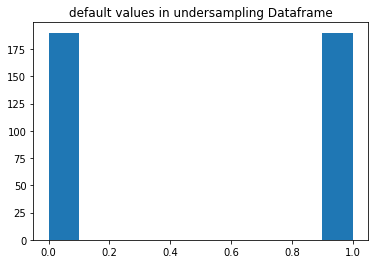

In [0]:
# Plot Histogram
plt.hist(df_train_under.default)

# Set title of histogram 
plt.title('default values in undersampling Dataframe')

In [0]:
# Display the percentage split
yes_count = df_train_under.default.value_counts()[0]
no_count = df_train_under.default.value_counts()[1]

print("Percentage yes:", (yes_count/len(df_train_under))*100, 
      "% Percentage No:", (no_count/len(df_train_under))*100,"%")

Percentage yes: 50.0 % Percentage No: 50.0 %


## Train a logistic regression model

In [0]:
# Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression

### Train set

In [0]:
# Display the head of the training dataframe
df_train.head()

,default,student,balance,income
6524,0,0,989.636310,27318.943706
4626,0,0,603.661670,44663.736117
8370,0,0,1491.707545,40637.447983
5786,0,0,818.334937,27390.836912
2550,0,0,1251.322550,37881.820958


In [0]:
# Train model for train set
train_model = LogisticRegression(penalty='none')
train_model.fit(df_train[['balance', 'income', 'student']], 
                df_train['default'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Oversampled train set

In [0]:
# Train model for train oversample set
train_over_model = LogisticRegression(penalty='none')
train_over_model.fit(df_train_over[['balance', 'income', 'student']], 
                     df_train_over['default'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Undersampled train set

In [0]:
# Train model for train undersample set
train_under_model = LogisticRegression(penalty='none')
train_under_model.fit(df_train_under[['balance', 'income', 'student']], 
                      df_train_under['default'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Examine the models

In [0]:
# Import the SKLearn metric libraries 
from sklearn.metrics import confusion_matrix, accuracy_score, \
                            precision_score, recall_score

### Examine df_train

In [0]:
# Predict the validation set using the training model
df_validation['default_pred'] = train_model.predict(
                                df_validation[['balance', 'income', 'student']])

# Create confusion matrix
#confusion_train = pd.crosstab(df_validation['default'],df_validation['default_pred'])

# Create a confusion matrix
confusion_train = confusion_matrix(df_validation['default'], 
                                   df_validation['default_pred'])

# Display the results of the confusion matrix
confusion_train

array([[1912,   10],
       [  62,   16]])

Text(0.5, 1, 'Original Training Data')

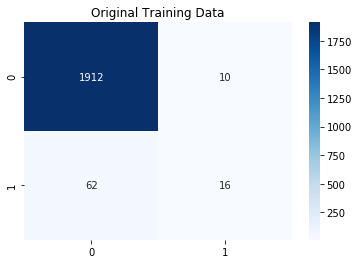

In [0]:
# Import the seaborn library for heatmap representations of confusion matrices
import seaborn as sn

# Generate a heatmap
sn.heatmap(confusion_train, annot=True, cmap='Blues', fmt='d')

# Set the title of the plot
plt.title("Original Training Data")

In [0]:
# Calculate the accuracy of the predictions
acc_train = accuracy_score(df_validation['default'], 
                           df_validation['default_pred'])

# Calculate the precision score from the predictions
precision_train = precision_score(df_validation['default'], 
                                  df_validation['default_pred'])

# Calculate the recall score from the predictions
recall_train = recall_score(df_validation['default'], 
                            df_validation['default_pred'])

# Display the results
print("Accuracy Score: ", acc_train)
print("Precision Score: ", precision_train)
print("Recall Score: ", recall_train)

Accuracy Score:  0.964
Precision Score:  0.6153846153846154
Recall Score:  0.20512820512820512


### Examine df_train_over

In [0]:
# Predict the validation set using the oversampled model
df_validation['default_pred_over'] = train_over_model.predict(
                              df_validation[['balance', 'income', 'student']])

# Create a confusion matrix
confusion_train_over = confusion_matrix(df_validation['default'],
                                        df_validation['default_pred_over'])

# Display the results of the confusion matrix
confusion_train_over

array([[1244,  678],
       [   8,   70]])

Text(0.5, 1, 'Oversampled Training Data')

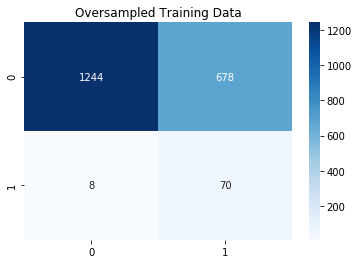

In [0]:
# Generate a heatmap
sn.heatmap(confusion_train_over, annot=True, cmap='Blues', fmt='d')

# Set the title of the plot
plt.title("Oversampled Training Data")

In [0]:
# Calculate the accuracy of the predictions
acc_train = accuracy_score(df_validation['default'], 
                           df_validation['default_pred_over'])

# Calculate the precision score from the predictions
precision_train = precision_score(df_validation['default'], 
                                  df_validation['default_pred_over'])

# Calculate the recall score from the predictions
recall_train = recall_score(df_validation['default'], 
                            df_validation['default_pred_over'])

# Display the results
print("Accuracy Score: ", acc_train)
print("Precision Score: ", precision_train)
print("Recall Score: ", recall_train)

Accuracy Score:  0.657
Precision Score:  0.09358288770053476
Recall Score:  0.8974358974358975


### Examine df_train_under

In [0]:
# Predict the validation set using the undersampled model
df_validation['default_pred_under'] = train_under_model.predict(
                              df_validation[['balance', 'income', 'student']])

# Create a confusion matrix
confusion_train_under = confusion_matrix(df_validation['default'],
                                         df_validation['default_pred_under'])

# Display the results of the confusion matrix
confusion_train_under

array([[1627,  295],
       [  10,   68]])

Text(0.5, 1, 'Undersampled Training Data')

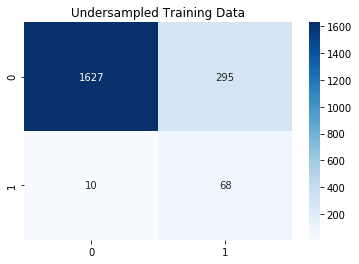

In [0]:
# Generate a heatmap
sn.heatmap(confusion_train_under, annot=True, cmap='Blues', fmt='d')

# Set the title of the plot
plt.title("Undersampled Training Data")

In [0]:
# Calculate the accuracy of the predictions
acc_train = accuracy_score(df_validation['default'], 
                           df_validation['default_pred_under'])
                           
# Calculate the precision score from the predictions
precision_train = precision_score(df_validation['default'], 
                                  df_validation['default_pred_under'])

# Calculate the recall score from the predictions
recall_train = recall_score(df_validation['default'], 
                            df_validation['default_pred_under'])

# Display the results
print("Accuracy Score: ", acc_train)
print("Precision Score: ", precision_train)
print("Recall Score: ", recall_train)

Accuracy Score:  0.8475
Precision Score:  0.18732782369146006
Recall Score:  0.8717948717948718


### Discussion

The three models that were used was the model based on the original training dataframe, the 

model trained on the oversampled training dataframe and the model trained on the undersampled 

training dataframe. For each of the three models the accuracy score, precision score, and the 

recall score is calculated and a corresponding confusion matrix is visualized. 

<br />

The accuracy score is the highest in the original training model, however its precision and 

recall scores are much worse than the other two models. This is because the original model 

is a naive classifier that is trained with majority of True Negatives and hence has a very low 

ability to predict True Positives. 

<br />

The recall and precision scores were the highest in the undersampled model. Running the 

simulation multiple times the undersampled model achieved equivalent or better scores 

compared with the oversampled model. Thus, I will choose this model being the best at 

detecting True Positives to predict on the testing dataframe.

## Apply to df_test

Accuracy Score:  0.835
Precision Score:  0.14854111405835543
Recall Score:  0.8615384615384616


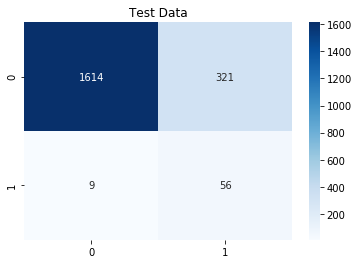

In [0]:
# Predict the test set using the undersampled model
df_test['default_pred'] = train_under_model.predict(
                                      df_test[['balance', 'income', 'student']])

# Create a confusion matrix
confusion_test = confusion_matrix(df_test['default'], df_test['default_pred'])

# Generate a heatmap
sn.heatmap(confusion_test, annot=True, cmap='Blues', fmt='d')

# Set the title of the plot
plt.title('Test Data')

# Calculate the accuracy of the predictions
acc_train = accuracy_score(df_test['default'], df_test['default_pred'])

# Calculate the precision score from the predictions
precision_train = precision_score(df_test['default'], df_test['default_pred'])

# Calculate the recall score from the predictions
recall_train = recall_score(df_test['default'], df_test['default_pred'])

# Display the results
print("Accuracy Score: ", acc_train)
print("Precision Score: ", precision_train)
print("Recall Score: ", recall_train)

### Discussion

The results that were collected doing predictions on the test dataframe as compared with the 

validation dataframe is similar. The accuracy and recall scores are about 1% less in the testing 

dataframe results. The predision score in the test dataframe is a about 3% less that in the 

validation dataframe. But the three scores and the confusion matrix closely matches those in 

the undersampled model predictions of the validation dataset.